In [4]:
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

"""
This notebook contains miscelleaneous plots for 
explaining the idea and illustrations in a publication.
"""

import sys
import os
import matplotlib.pyplot as plt

sys.path.append('../')
sys.path.append('../paretoviz')
from paretoviz.utils import fmt
from paretoviz.utils import vectorops as vops

from paretoviz import normalizer as nrm
from paretoviz import peeler as plr
from paretoviz import palettizer as pltz
from paretoviz import decorator as dcor
from paretoviz import plotting as pplt

# Do all these plots with centroid based coloring

rawfpath = "../data/spherical-equidist/spherical-equidist-3d.out"

# do visualization based on distance from the centroid?
docentroid = False

# get the path and filename from the rawfpath
path, rawfile = os.path.split(rawfpath)
# get the prefix
prefix = rawfile.split('.')[0]
normfname = prefix + "-norm.out"

In [2]:
# This part does the normalizer.py operation

vals = fmt.load(rawfpath)

print("Normalizing {0:d} data points.".format(len(vals)))
vals_ = nrm.normalize(vals)
fmt.cat(vals_)

path, rawfile = os.path.split(rawfpath)
normfile = os.path.join(path, normfname)
print("Saving normalized data into {0:s} ...".format(normfile))
fmt.save(vals_, normfile)

Normalizing 376 data points.
9.9378e-01	0.0000e+00	1.1889e-01
5.0813e-01	2.0026e-03	8.6171e-01
8.9215e-01	5.3405e-03	4.5294e-01
1.8050e-01	7.3432e-03	9.8450e-01
6.8178e-01	1.0681e-02	7.3193e-01
9.6879e-01	1.4018e-02	2.5047e-01
3.8823e-01	1.6021e-02	9.2197e-01
8.2337e-01	1.9359e-02	5.6795e-01
4.7148e-02	2.1362e-02	1.0000e+00
1.0000e+00	2.2697e-02	3.6323e-02
5.7758e-01	2.4700e-02	8.1635e-01
9.2627e-01	2.8037e-02	3.7747e-01
2.6130e-01	3.0040e-02	9.6555e-01
7.3970e-01	3.3378e-02	6.7263e-01
9.8568e-01	3.6716e-02	1.6942e-01
4.6295e-01	3.8718e-02	8.8598e-01
8.6699e-01	4.2056e-02	4.9754e-01
1.2970e-01	4.4058e-02	9.9165e-01
6.4268e-01	4.7397e-02	7.6507e-01
9.5352e-01	5.0734e-02	2.9932e-01
3.4004e-01	5.2737e-02	9.3953e-01
7.9207e-01	5.6074e-02	6.0849e-01
9.9528e-01	5.9413e-02	8.7265e-02
5.3414e-01	6.1416e-02	8.4355e-01
9.0414e-01	6.4753e-02	4.2362e-01
2.1111e-01	6.6756e-02	9.7604e-01
7.0290e-01	7.0093e-02	7.0826e-01
9.7370e-01	7.3432e-02	2.1915e-01
4.1608e-01	7.5434e-02	9.0668e-01
8.3847e-01	7.8

In [5]:
# This part does the peeler.py operation

mode = "default"

normfpath = os.path.join(path, normfname)
points = fmt.load(normfpath)

m = len(points[0])
print("Peeling data point cloud in {0:s} mode ...".format(mode))
if mode == "default":
    # the defualt mode will project the points 
    # on a simplex on the first quadrant
    ppoints = plr.project(points)
    cpoints = plr.collapse(ppoints, dim = m - 1)
    boundaries = plr.peel(cpoints)
elif mode == "no-project":
    boundaries = plr.peel(points)
fmt.cat(boundaries, dtype = 'int')

layerfpath = os.path.join(path, normfname.split('.')[0] + "-layers.out")
print("Saving {0:d} layers into {1:s} ...".format(len(boundaries), layerfpath))
fmt.save(boundaries, layerfpath, dtype = 'int')

Peeling data point cloud in default mode ...
Total points: 376
Computing alpha-shape ...
alpha-shape done.
Layer 0: points added 23, points left 353.
Computing alpha-shape ...
alpha-shape done.
Layer 1: points added 27, points left 326.
Computing alpha-shape ...
alpha-shape done.
Layer 2: points added 27, points left 299.
Computing alpha-shape ...
alpha-shape done.
Layer 3: points added 31, points left 268.
Computing alpha-shape ...
alpha-shape done.
Layer 4: points added 32, points left 236.
Computing alpha-shape ...
alpha-shape done.
Layer 5: points added 31, points left 205.
Computing alpha-shape ...
alpha-shape done.
Layer 6: points added 30, points left 175.
Computing alpha-shape ...
alpha-shape done.
Layer 7: points added 29, points left 146.
Computing alpha-shape ...
alpha-shape done.
Layer 8: points added 28, points left 118.
Computing alpha-shape ...
alpha-shape done.
Layer 9: points added 24, points left 94.
Computing alpha-shape ...
alpha-shape done.
Layer 10: points added 2

In [14]:
# This part does the palettizer.py operation

# mode = "invsc"
# mode = "invrv"
# mode = "rv"
mode = "sc"

n_layers = 16
normfpath = os.path.join(path, normfname)
points = fmt.load(normfpath)

layerfile = normfname.split('.')[0] + "-layers.out"
layers = fmt.load(os.path.join(path, layerfile), dtype = 'int')

print("Computing palette coordinates with {0:d} layers in {1:s} mode ...".format(n_layers, mode))
if mode == "invsc":
    palette_coords = pltz.palettize_sc(points, layers, n_layers = n_layers, inverted = True)
    palettefpath = os.path.join(path, normfname.split('.')[0] + "-palette-invsc-sep.out")
elif mode == "invrv":
    palette_coords = pltz.palettize_rv(points, layers, n_layers = n_layers, inverted = True)
    palettefpath = os.path.join(path, normfname.split('.')[0] + "-palette-invrv-sep.out")
elif mode == "rv":
    palette_coords = pltz.palettize_rv(points, layers, n_layers = n_layers)
    palettefpath = os.path.join(path, normfname.split('.')[0] + "-palette-rv-sep.out")
elif mode == "sc":
    palette_coords = pltz.palettize_sc(points, layers, n_layers = n_layers)
    palettefpath = os.path.join(path, normfname.split('.')[0] + "-palette-sc-sep.out")
else:
    print("Error: unknown mode \'{0:s}\'\n".format(mode))
    sys.exit(1)

print("Saving palette coordinates into {0:s} ...".format(palettefpath))
pltz.save_palette(palette_coords, palettefpath)

Computing palette coordinates with 16 layers in sc mode ...
Saving palette coordinates into ../data/spherical-equidist/spherical-equidist-3d-norm-palette-sc-sep.out ...


In [15]:
# This part does the palettizer.py operation

n_layers = 4
normfpath = os.path.join(path, normfname)
points = fmt.load(normfpath)

layerfile = normfname.split('.')[0] + "-layers.out"
layers = fmt.load(os.path.join(path, layerfile), dtype = 'int')

print("Computing palette coordinates with {0:d} layers in {1:s} mode ...".format(n_layers, mode))
if mode == "invsc":
    palette_coords = pltz.palettize_sc(points, layers, n_layers = n_layers, inverted = True)
    palettefpath = os.path.join(path, normfname.split('.')[0] + "-palette-invsc.out")
elif mode == "invrv":
    palette_coords = pltz.palettize_rv(points, layers, n_layers = n_layers, inverted = True)
    palettefpath = os.path.join(path, normfname.split('.')[0] + "-palette-invrv.out")
elif mode == "rv":
    palette_coords = pltz.palettize_rv(points, layers, n_layers = n_layers)
    palettefpath = os.path.join(path, normfname.split('.')[0] + "-palette-rv.out")
elif mode == "sc":
    palette_coords = pltz.palettize_sc(points, layers, n_layers = n_layers)
    palettefpath = os.path.join(path, normfname.split('.')[0] + "-palette-sc.out")
else:
    print("Error: unknown mode \'{0:s}\'\n".format(mode))
    sys.exit(1)

print("Saving palette coordinates into {0:s} ...".format(palettefpath))
pltz.save_palette(palette_coords, palettefpath)

Computing palette coordinates with 4 layers in sc mode ...
Saving palette coordinates into ../data/spherical-equidist/spherical-equidist-3d-norm-palette-sc.out ...


<IPython.core.display.Javascript object>


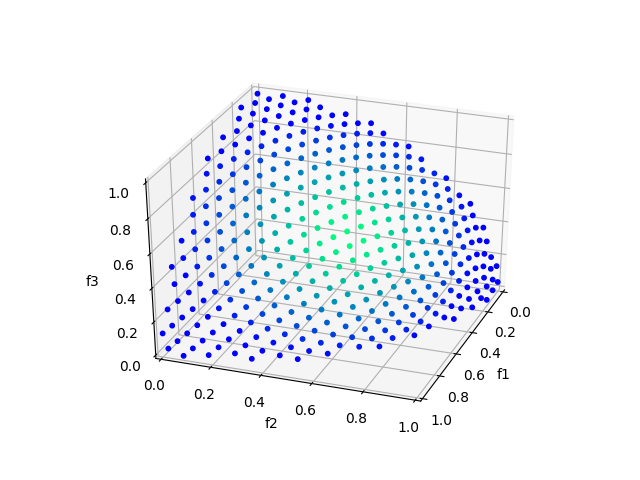

In [16]:
# load the normalized data points
points = fmt.load(os.path.join(path, normfname))
# color them by the centroid
color = dcor.recolor_by_centroid(points)

# do the scatter plot
(fig, ax) = pplt.scatter(points, s = 10.0, c = color, camera = [32, 20], \
                         lims = [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]])
# save the scatter plot
scatterfpath = os.path.join(path, prefix + "-scatter.pdf")
plt.savefig(scatterfpath, transparent = False)

plt.show()

<IPython.core.display.Javascript object>


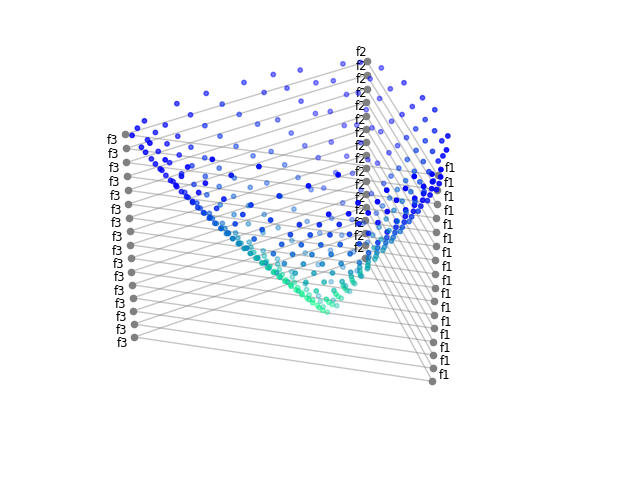

In [17]:
palette_coords = fmt.load(os.path.join(path, normfname.split('.')[0] + "-palette-" + mode + "-sep.out"))
# do the paletteviz plot
(fig, ax) = pplt.paletteviz(palette_coords, dim = len(points[0]), \
            s = 10.0, c = color, camera = [31, -41])
# save the paletteviz plot
fig.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, wspace = 0, hspace = 0)
palettefpath = os.path.join(path, prefix + "-norm-palette-" + mode + "-sep.pdf")
plt.savefig(palettefpath, transparent = False, bbox_inches = 'tight', pad_inches = 0)

plt.show()

<IPython.core.display.Javascript object>


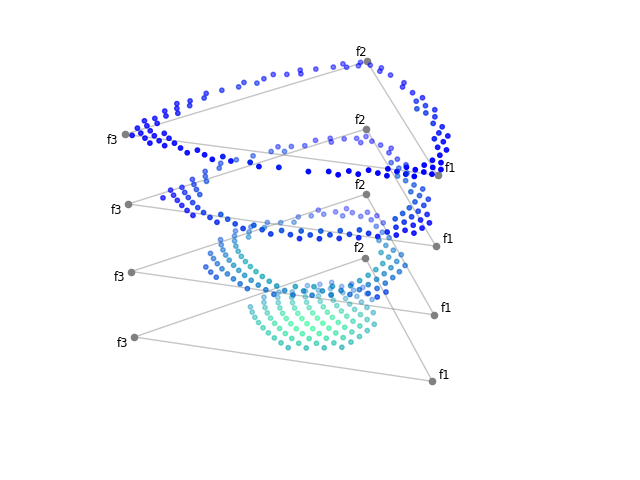

In [18]:
palette_coords = fmt.load(os.path.join(path, normfname.split('.')[0] + "-palette-" + mode + ".out"))
# do the paletteviz plot
(fig, ax) = pplt.paletteviz(palette_coords, dim = len(points[0]), \
            s = 10.0, c = color, camera = [31, -41])
# save the paletteviz plot
fig.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, wspace = 0, hspace = 0)
palettefpath = os.path.join(path, prefix + "-norm-palette-" + mode + ".pdf")
plt.savefig(palettefpath, transparent = False, bbox_inches = 'tight', pad_inches = 0)

plt.show()